In [2]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data
dataset = pd.read_csv(r"C:\Users\swaraj jaiswal\OneDrive\Desktop\student_info.csv")

In [5]:
#analyise data
dataset.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
dataset.shape

(200, 2)

# Discover and visualize data to gain insight

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
dataset.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [12]:
dataset.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Student marks acooring to study hours')

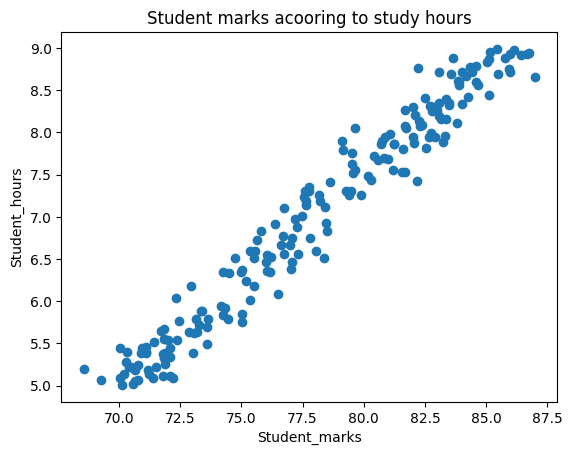

In [15]:
plt.scatter(dataset.student_marks,dataset.study_hours)
plt.xlabel("Student_marks")
plt.ylabel("Student_hours")
plt.title("Student marks acooring to study hours")

Conculsion:
this is strong +ve corelation

# prepare data for ml model

1.clean data

In [17]:
dataset.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [18]:
df = dataset.fillna(dataset.mean())

In [19]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [20]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [23]:
# study hours is independent 
#study marks is dependent
X = df.drop('student_marks',axis = 'columns')

In [28]:
y = df.drop('study_hours',axis ='columns')

In [29]:
print("shape of X : ",X.shape)
print("shape of y : ",y.shape)

shape of X :  (200, 1)
shape of y :  (200, 1)


In [30]:
#split into train test
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [33]:
print("shape of X_train : ",X_train.shape)
print("shape of y_train : ",y_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of y_test : ",y_test.shape)

shape of X_train :  (160, 1)
shape of y_train :  (160, 1)
shape of X_test :  (40, 1)
shape of y_test :  (40, 1)


In [38]:
#we chose this model because our data is in linear and strong +ve line
# and why regression because we have continous dependent variable 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [39]:
# y = mx+c because it is showing straight line
#now for the equation we need to find m and c

In [40]:
# here we are traning the data
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
#here after training lr find m and c
#to check that 
lr.coef_ # m

array([[3.93037294]])

In [44]:
lr.intercept_ # c

array([50.45063632])

In [53]:
# seeing how our model works
c = 3.93
m = 50.44
y = m*4 +c

In [57]:
# here we predict our example 
#we take [0] to remove the array and we take it 2 time because our array is in 2dimennsion
#round to take 2 values after decimal
lr.predict([[4]])[0][0].round(2)

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.17

In [58]:
#now we are doing testing
y_pred = lr.predict(X_test)

In [61]:
y_pred = y_pred.round(2)

In [62]:
y_pred

array([[83.51],
       [70.85],
       [72.93],
       [85.35],
       [73.21],
       [84.49],
       [80.12],
       [81.85],
       [80.91],
       [82.21],
       [78.99],
       [84.84],
       [77.85],
       [77.69],
       [83.23],
       [85.78],
       [84.96],
       [72.62],
       [78.71],
       [79.18],
       [84.29],
       [85.63],
       [74.74],
       [81.34],
       [72.03],
       [80.4 ],
       [78.99],
       [82.09],
       [77.95],
       [82.25],
       [75.45],
       [84.61],
       [71.64],
       [75.49],
       [70.3 ],
       [78.99],
       [75.33],
       [84.53],
       [74.07],
       [71.44]])

In [67]:
# now we will compair actual with predicited value
#np.c_ this is used to concat the features
pd.DataFrame(np.c_[X_test.round(2),y_test,y_pred],columns =["student_study_hours","student_actual_marks","student_predicted_marks"])

,student_study_hours,student_actual_marks,student_predicted_marks
0,8.41,82.50,83.51
1,5.19,71.18,70.85
2,5.72,73.25,72.93
3,8.88,83.64,85.35
4,5.79,73.64,73.21
5,8.66,86.99,84.49
6,7.55,81.18,80.12
7,7.99,82.75,81.85
8,7.75,79.50,80.91
9,8.08,81.70,82.21


# fine tune model

In [70]:
variance =lr.score(X_test,y_test)

In [71]:
bias = lr.score(X_train,y_train)

In [72]:
print(variance)
print(bias)

0.9521841793508595
0.9584528455152638


# conclusion : 
model is good

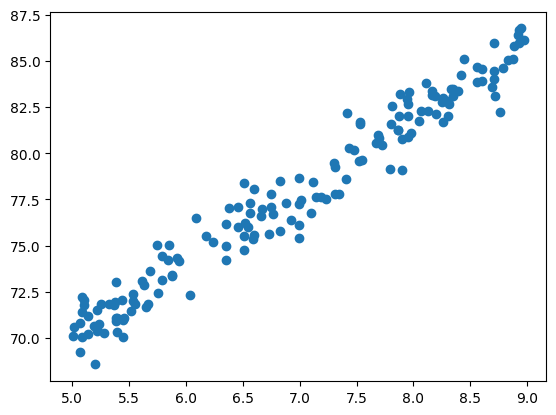

In [73]:
plt.scatter(X_train,y_train)

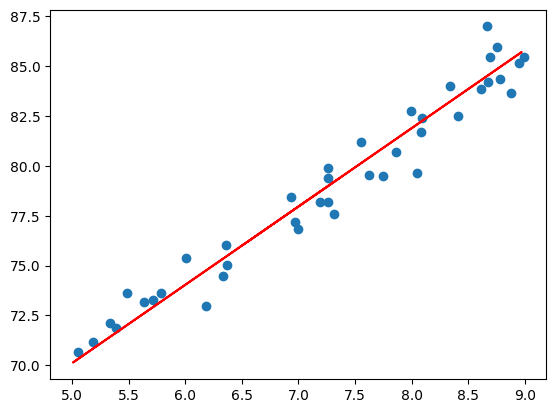

In [77]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color ='r')

# Present your solution

In [78]:
# with 95% accuracy

# saveing our model


In [79]:
import joblib

In [80]:
#with this dump method we can save our model
# first we need to give model name
#then file name by which we want to save
joblib.dump(lr,"student_marks_predictor_model.pkl")

['student_marks_predictor_model.pkl']